In [2]:
from sympy import *

# tau_s = 0.1 #N*m
# omega_f = 1000 #about 10,000rpm

tau_max, omega_max = symbols("tau_max, omega_max") #stall torque, free speed
# free_speed = 1000 #about 10,000rpm


T1, T2, k, m_a, m_l = symbols('T1, T2, k, m_a, m_l')
c0, c1, c2, c3, c4, c5, c6 = symbols('c:7')

t = symbols('t')

c1 = omega_max*T1**2 / tau_max
c2 = -omega_max*T1 / (tau_max*T2)
c3 = -T1 / (T2*m_l)
c4 = 1 / (T2**2 * m_l)


A = Matrix([
    [c1, c2, 0, omega_max],
    [0, 0, 1, 0],
    [c3, c4, 0, 0],
    [0, 0, 0, 0]
])

A

Matrix([
[T1**2*omega_max/tau_max, -T1*omega_max/(T2*tau_max), 0, omega_max],
[                      0,                          0, 1,         0],
[           -T1/(T2*m_l),              1/(T2**2*m_l), 0,         0],
[                      0,                          0, 0,         0]])

In [3]:
xsol = simplify((A*t).exp())
xsol

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  (-T1**2*T2*m_l*omega_max*exp(t*(T1**2*T2*m_l*omega_max - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) + T1**2*T2*m_l*omega_max*exp(t*(T1**2*T2*m_l*omega_max + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/(2*T2*m_l*tau_max)) + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)))/sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2)),                             

In [9]:
count_ops(xsol)

2074

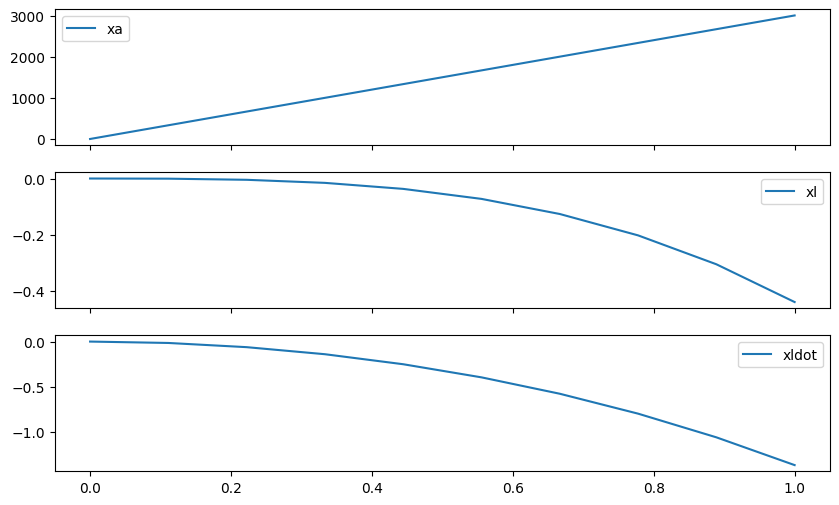

In [7]:
import numpy as np
import matplotlib.pyplot as plt

nums = {
    T1: 0.00025, #0.035 m / 140 rad from TSA test
    T2: 3, #guess for leg movement/string contract
    m_a: 1/2 * 0.020 * 0.010**2, #cylinder MOI 20g 10mm radius
    m_l: 0.1, #mass to push off ground
    k: 3000, # no idea honestly
    tau_max: 0.1, #N*m stall torque
    omega_max: 3000, #about 10,000rpm free speed
}

xoft = xsol.subs(nums)

X = Matrix([0, 0, 0, 1])

ts = np.linspace(0, 1, 10)
Xs = []

for ti in ts:
    Xs.append(xoft.subs(t,ti) @ X)


Xs = np.array(Xs).reshape((-1,4)).T

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(10,6))

axs[0].plot(ts, Xs[0], label='xa')
axs[1].plot(ts, Xs[1], label='xl')
axs[2].plot(ts, Xs[2], label='xldot')

for i in range(len(axs)):
    axs[i].legend()

plt.show()

In [36]:
A.subs(nums).eigenvects()

[(1.37476835471162e-19,
  1,
  [Matrix([
   [   -0.999999718750119],
   [-0.000749999789062589],
   [-1.03107597604364e-22]])]),
 (1.05503047029122,
  1,
  [Matrix([
   [-1.00031632783376],
   [0.421395445071901],
   [0.444585034592784]])]),
 (-1.05315547029122,
  1,
  [Matrix([
   [-0.999683872166222],
   [ -0.42187877831763],
   [ 0.444303943184988]])])]

In [6]:
eigs = A.eigenvects()
for eig in eigs:
    display(eig[0], eig[2][0])

0

Matrix([
[1/(T1*T2)],
[        1],
[        0]])

T1**2*omega_max/(2*tau_max) - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(2*T2*m_l*tau_max)

Matrix([
[                                                                                                                             -T1*T2*m_l*omega_max/tau_max],
[-T1**2*T2**2*m_l*omega_max/tau_max + T2**2*m_l*(T1**2*omega_max/(2*tau_max) - sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(2*T2*m_l*tau_max))],
[                                                                                                                                                        1]])

T1**2*omega_max/(2*tau_max) + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(2*T2*m_l*tau_max)

Matrix([
[                                                                                                                             -T1*T2*m_l*omega_max/tau_max],
[-T1**2*T2**2*m_l*omega_max/tau_max + T2**2*m_l*(T1**2*omega_max/(2*tau_max) + sqrt(m_l*(T1**4*T2**2*m_l*omega_max**2 + 4*tau_max**2))/(2*T2*m_l*tau_max))],
[                                                                                                                                                        1]])